**Atividade**

Agora é hora de aplicar o que aprendemos em sala.

Escolha um dos Dataset abaixo e treine um modelo de visão computacional para classificar as imagens. Explore o máximo do conteúdo vimos até aqui. Fale sobre a arquitetura usada, estratégia, resultado e conclusão.

*	Classificação de grãos de café – Conjunto de dados com imagens de grãos de café para classificação do nível de torrefação (Dark, Green, Light, Medium):
https://www.kaggle.com/datasets/gpiosenka/coffee-bean-dataset-resized-224-x-224

*	Classificação de gado por raça – Conjunto de dados com imagens de gados de diferentes raças para classificação (ex. Belmont, Gir, Jersey, etc.):
https://www.kaggle.com/datasets/iamshahadat/cattle

*	Detecção de insetos e pragas agrícolas em imagens – Conjunto com 12 diferentes espécies insetos e pragas agrícolas:
https://www.kaggle.com/datasets/vencerlanz09/agricultural-pests-image-dataset



# Classificação de grãos de café

In [1]:
! kaggle datasets download -d gpiosenka/coffee-bean-dataset-resized-224-x-224

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/coffee-bean-dataset-resized-224-x-224
License(s): CC-BY-SA-4.0
100% 144M/144M [00:05<00:00, 32.1MB/s]
100% 144M/144M [00:05<00:00, 25.6MB/s]


In [2]:
!unzip /content/coffee-bean-dataset-resized-224-x-224.zip

Archive:  /content/coffee-bean-dataset-resized-224-x-224.zip
  inflating: Coffee Bean.csv         
  inflating: test/Dark/dark (1).png  
  inflating: test/Dark/dark (10).png  
  inflating: test/Dark/dark (100).png  
  inflating: test/Dark/dark (11).png  
  inflating: test/Dark/dark (12).png  
  inflating: test/Dark/dark (13).png  
  inflating: test/Dark/dark (14).png  
  inflating: test/Dark/dark (15).png  
  inflating: test/Dark/dark (16).png  
  inflating: test/Dark/dark (17).png  
  inflating: test/Dark/dark (18).png  
  inflating: test/Dark/dark (19).png  
  inflating: test/Dark/dark (2).png  
  inflating: test/Dark/dark (20).png  
  inflating: test/Dark/dark (21).png  
  inflating: test/Dark/dark (22).png  
  inflating: test/Dark/dark (23).png  
  inflating: test/Dark/dark (24).png  
  inflating: test/Dark/dark (25).png  
  inflating: test/Dark/dark (26).png  
  inflating: test/Dark/dark (27).png  
  inflating: test/Dark/dark (28).png  
  inflating: test/Dark/dark (29).png  
  inf

In [3]:
!apt-get install tree
!tree -d train

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (478 kB/s)
Selecting previously unselected package tree.
(Reading database ... 123586 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
train
├── Dark
├── Green
├── Light
└── Medium

4 directories


In [4]:
import os
def listar_pastas(diretorio):
    if os.path.exists(diretorio):
        itens = os.listdir(diretorio)
        pastas = [item for item in itens if os.path.isdir(os.path.join(diretorio, item))]
        return pastas
    else:
        print(f'O diretório {diretorio} não existe.')

diretorio = '/content/test'
pastas = listar_pastas(diretorio)

In [5]:
pastas.sort()
pastas

['Dark', 'Green', 'Light', 'Medium']

In [6]:
import tensorflow as tf
import os
import numpy as np

labels = []
images_data = tf.zeros([0,256,256,3], dtype=tf.float32)
ps = ['test/','train/']
directory ='/content/'

for p in pastas:

  for a in ps:

    directory = '/content/'+a+p

    # Função para processar os arquivos
    def process_image(file_path):
        # Lê o arquivo e converte para uma imagem
        img = tf.io.read_file(file_path)
        img = tf.image.decode_jpeg(img, channels=3)  # Use decode_jpeg para definir a forma
        img = tf.image.resize(img, [256, 256])  # Redimensionar a imagem para um tamanho fixo
        img = img / 255.0  # Normalizar os valores dos pixels para [0, 1]
        return img

    # Criar um dataset a partir dos arquivos
    list_ds = tf.data.Dataset.list_files(os.path.join(directory, '*'))

    # Aplicar a função de processamento ao dataset
    image_ds = list_ds.map(process_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

    # Define a batch size para agrupar todas as imagens em um único batch
    batch_size = tf.data.experimental.cardinality(image_ds).numpy()
    image_ds = image_ds.batch(batch_size)

    # Converter o dataset em um tensor
    for images_tensor in image_ds:
      continue

    images_data = tf.concat([images_data, images_tensor], axis=0)
    labels = np.concatenate((labels, [p] * images_tensor.shape[0]))


In [7]:
labels.shape, images_data.shape

((1600,), TensorShape([1600, 256, 256, 3]))

In [8]:
images_data[0]

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.8901961 , 0.8980392 , 0.8862745 ],
        [0.89656866, 0.907598  , 0.8926471 ],
        [0.8656863 , 0.877451  , 0.86446077],
        ...,
        [0.8232843 , 0.8272059 , 0.80759805],
        [0.82990193, 0.8330882 , 0.81421566],
        [0.8235294 , 0.8235294 , 0.80784315]],

       [[0.877451  , 0.88848037, 0.87671566],
        [0.89159006, 0.9032169 , 0.8882659 ],
        [0.8865962 , 0.8961703 , 0.88318014],
        ...,
        [0.835432  , 0.83835787, 0.8197457 ],
        [0.8297028 , 0.8308977 , 0.8140165 ],
        [0.8362745 , 0.8394608 , 0.82058823]],

       [[0.8745098 , 0.8862745 , 0.8745098 ],
        [0.8970129 , 0.9087776 , 0.89601713],
        [0.89024204, 0.90116423, 0.88901657],
        ...,
        [0.8562653 , 0.8589614 , 0.84057903],
        [0.8412837 , 0.84151345, 0.8255974 ],
        [0.83112746, 0.83235294, 0.8154412 ]],

       ...,

       [[0.93602943, 0.94779414, 0.9438726 ],
        [0.93

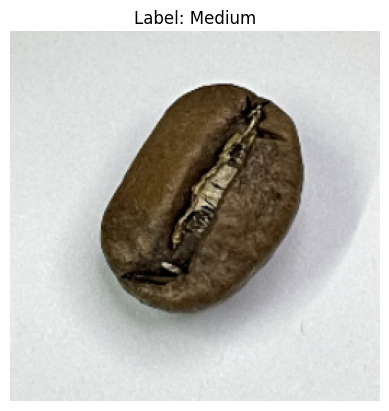

In [9]:
import matplotlib.pyplot as plt

plt.imshow(images_data[1550])
plt.title(f"Label: {labels[1550]}")
plt.axis('off')
plt.show()

In [10]:
import numpy as np

# Definir o intervalo de valores e o tamanho da amostra
interval = np.arange(0, 101)  # Intervalo de 0 a 100 (incluindo 100)
sample_size = 10

# Selecionar uma amostra aleatória
random_sample = np.random.choice(interval, size=sample_size, replace=False)

print(random_sample)


[44 66 85 32 57 64 71 86 21 40]


In [11]:
# Função para plotar uma amostra do dataset
def plot_sample_from_dataset(dataset, class_names, num_images):

    # Definir o intervalo de valores e o tamanho da amostra
    interval = np.arange(0, len(dataset)+1)  # Intervalo de 0 a 100 (incluindo 100)
    sample_size = num_images

    # Selecionar uma amostra aleatória
    random_sample = np.random.choice(interval, size=sample_size, replace=False)

    # Pegar um lote de amostras do dataset
    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        s = random_sample[i]
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(dataset[s])
        class_label = class_names[s]
        plt.title(f'Imagem: {s}\nClasse: {class_label}')
        plt.axis("off")
    plt.show()


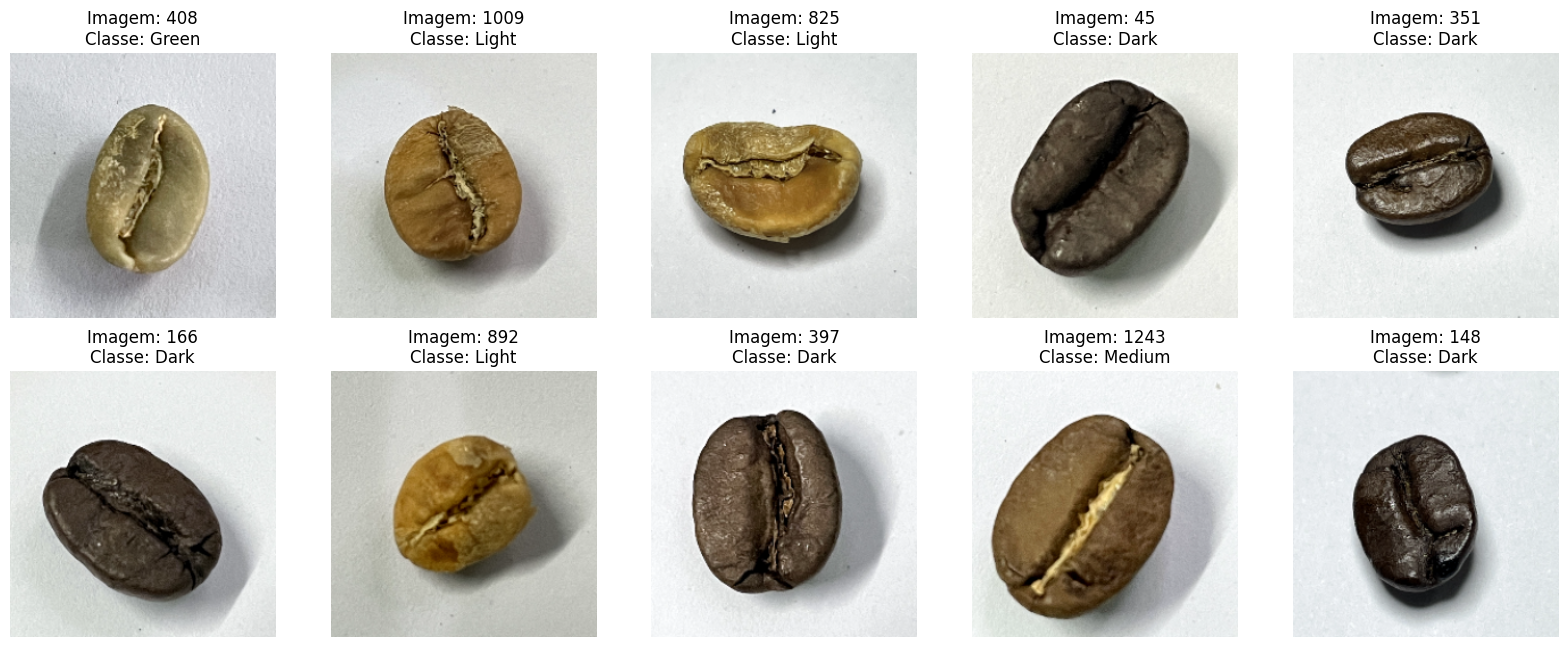

In [12]:
plot_sample_from_dataset(images_data, labels, 10)


In [13]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

labels_encoder = LabelEncoder()

# Ajustar o LabelEncoder e transformar os rótulos categóricos em numéricos
rotulos_numericos = labels_encoder.fit_transform(labels)

print("Rótulos categóricos:", labels[:10])
print("Rótulos numéricos:", rotulos_numericos[:10])
print(rotulos_numericos.shape)


Rótulos categóricos: ['Dark' 'Dark' 'Dark' 'Dark' 'Dark' 'Dark' 'Dark' 'Dark' 'Dark' 'Dark']
Rótulos numéricos: [0 0 0 0 0 0 0 0 0 0]
(1600,)


In [14]:
# Recuperar os nomes das classes
class_names = labels_encoder.classes_
amostra = rotulos_numericos[0]
print(f'Rótulo numérico:{amostra}')
print(f'Classe: {class_names[amostra]}')

Rótulo numérico:0
Classe: Dark


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images_data.numpy(), rotulos_numericos, test_size=0.2, random_state=42, shuffle=True)

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True)

In [17]:
# Função para redimensionar imagens
def resize_images(images, new_size=(512, 512)):
    resized_images = tf.image.resize(images, new_size)
    return resized_images

In [18]:
# Redimensionar as imagens de treinamento e validação
X_train = resize_images(X_train)
X_val = resize_images(X_val)
X_test = resize_images(X_test)

In [20]:
print(f'Train data:')
print(f'X_train: {X_train.shape}\ny_train:{y_train.shape}\n')
print(f'Test data:')
print(f'X_test: {X_test.shape}\ny_test:{y_test.shape}\n')
print(f'Validation data:')
print(f'X_val: {X_val.shape}\ny_val:{y_val.shape}\n')

Train data:
X_train: (1024, 512, 512, 3)
y_train:(1024,)

Test data:
X_test: (320, 512, 512, 3)
y_test:(320,)

Validation data:
X_val: (256, 512, 512, 3)
y_val:(256,)



In [21]:
 len(np.unique(labels))

4

In [22]:
num_classes =  len(np.unique(labels))
print(num_classes )

4


Construindo a rede

In [23]:
# Definir o modelo
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(512, 512, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.AveragePooling2D(),
    #tf.keras.layers.Dropout(0.1),  # Dropout para prevenir overfitting


    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Dropout(0.2),  # Dropout para prevenir overfitting

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Dropout(0.3),  # Dropout para prevenir overfitting



    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout para prevenir overfitting


    tf.keras.layers.Dense(num_classes, activation='softmax')
])

**Visualizando a estrutura da rede**

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 32)      896       
                                                                 
 average_pooling2d (Average  (None, 256, 256, 32)      0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      18496     
                                                                 
 average_pooling2d_1 (Avera  (None, 128, 128, 64)      0         
 gePooling2D)                                                    
                                                                 
 dropout (Dropout)           (None, 128, 128, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     7

**Compliando o Modelo**

In [25]:
# Compile o modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


**Checkpoints - Salvando o Modelo**

In [26]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

In [27]:
# Caminho para salvar o melhor modelo
checkpoint_filepath = '/content/best_model.h5'

In [28]:
# Configurar o callback para salvar o melhor modelo
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

**Treinando o modelo**

In [29]:
# Treinar o modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    callbacks=[checkpoint_callback]
)

Epoch 1/10
32/32 [==============================] - ETA: 0s - loss: 2.5944 - accuracy: 0.3623

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 46s 1s/step - loss: 2.5944 - accuracy: 0.3623 - val_loss: 0.7918 - val_accuracy: 0.7031
Epoch 2/10
32/32 [==============================] - 37s 1s/step - loss: 0.4264 - accuracy: 0.8369 - val_loss: 0.1526 - val_accuracy: 0.9531
Epoch 3/10
32/32 [==============================] - 30s 946ms/step - loss: 0.2139 - accuracy: 0.9238 - val_loss: 0.0661 - val_accuracy: 0.9805
Epoch 4/10
32/32 [==============================] - 40s 1s/step - loss: 0.1676 - accuracy: 0.9434 - val_loss: 0.0509 - val_accuracy: 0.9844
Epoch 5/10
32/32 [==============================] - 14s 430ms/step - loss: 0.1283 - accuracy: 0.9551 - val_loss: 0.0763 - val_accuracy: 0.9609
Epoch 6/10
32/32 [==============================] - 14s 446ms/step - loss: 0.2192 - accuracy: 0.9209 - val_loss: 0.2719 - val_accuracy: 0.8945
Epoch 7/10
32/32 [==============================] - 14s 442ms/step - loss: 0.1307 - accuracy: 0.9492 - val_loss: 0.0983 - val_accuracy: 0.9531
Epoch 8/10
32/32 [=

Avaliação do treino do Modelo

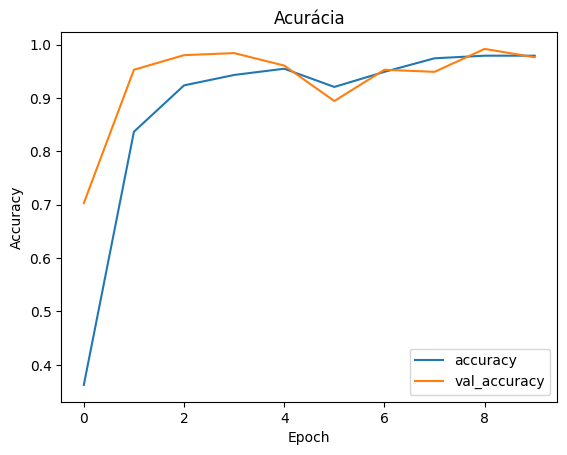

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Acurácia')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

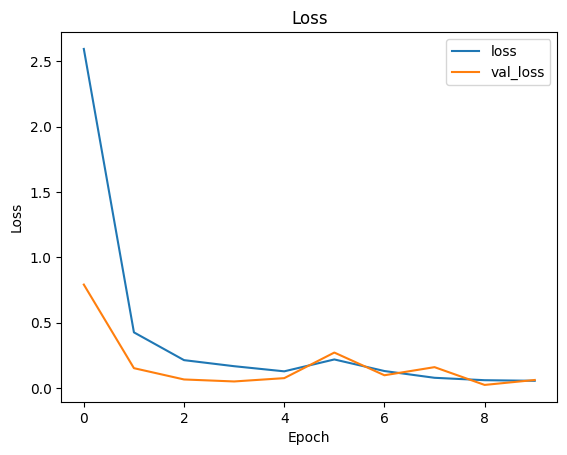

In [31]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
# plt.ylim([0.5, 1])
plt.legend(loc='upper right')


Avaliação do Modelo

In [32]:
# Avaliar o modelo nos dados de teste
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

10/10 [==============================] - 1s 89ms/step - loss: 0.0984 - accuracy: 0.9625
Test accuracy: 0.96


Predição

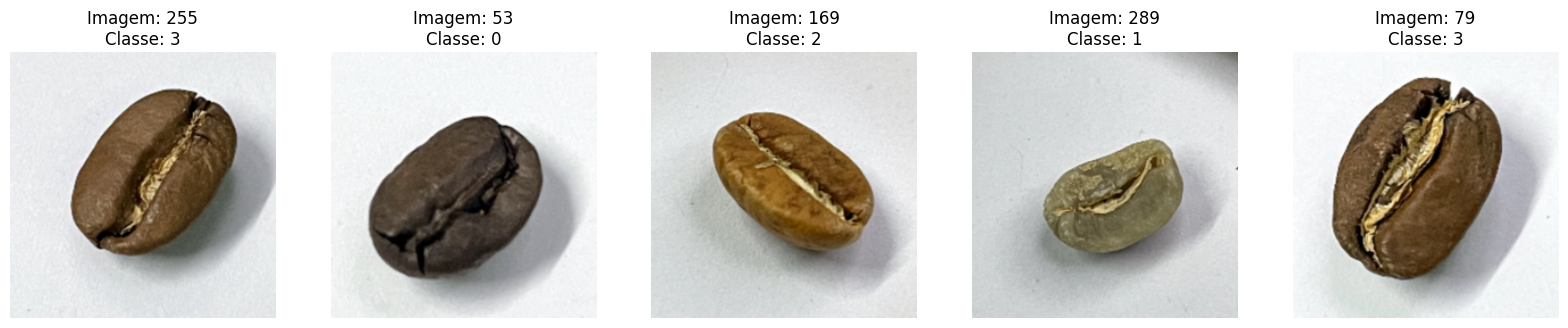

In [33]:
# Função para plotar uma amostra do dataset
plot_sample_from_dataset(X_test, y_test, 5)

In [34]:
# Adicionar uma dimensão extra para converter a imagem em um lote
image_pred = np.expand_dims(X_test[0], axis=0)

# Fazer uma previsão
predictions = model.predict(image_pred)

# Obter o índice da classe com a maior probabilidade
predicted_class_index = np.argmax(predictions)

print(predicted_class_index)
# Recuperar os nomes das classes
class_names = labels_encoder.classes_
print(class_names[predicted_class_index])

1/1 [==============================] - 0s 407ms/step
1
Green


In [35]:
# Função para plotar uma amostra do dataset
def plot_predictions_samples(dataset_test, class_names_teste, num_images):
    class_names = labels_encoder.classes_

    # Definir o intervalo de valores e o tamanho da amostra
    interval = np.arange(0, len(dataset_test)+1)  # Intervalo de 0 a 100 (incluindo 100)
    sample_size = num_images

    # Selecionar uma amostra aleatória
    random_sample = np.random.choice(interval, size=sample_size, replace=False)


    # Pegar um lote de amostras do dataset
    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        s = random_sample[i]

        # Adicionar uma dimensão extra para converter a imagem em um lote
        image_pred = np.expand_dims(dataset_test[s], axis=0)

        # Fazer uma previsão
        predictions = model.predict(image_pred)

        # Obter o índice da classe com a maior probabilidade
        predicted_class_index = np.argmax(predictions)

        #retornando o nome da classe predita
        class_pred = class_names[predicted_class_index]

        #retornando o nome da classe original
        class_real= class_names[class_names_teste[s]]

        #Plotando o Gráfico
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(dataset_test[s])
        plt.title(f'Imagem: {s}\nClasse Real: {class_real}\nClasse Predita: {class_pred}')
        plt.axis("off")
    plt.show()


1/1 [==============================] - 0s 20ms/step


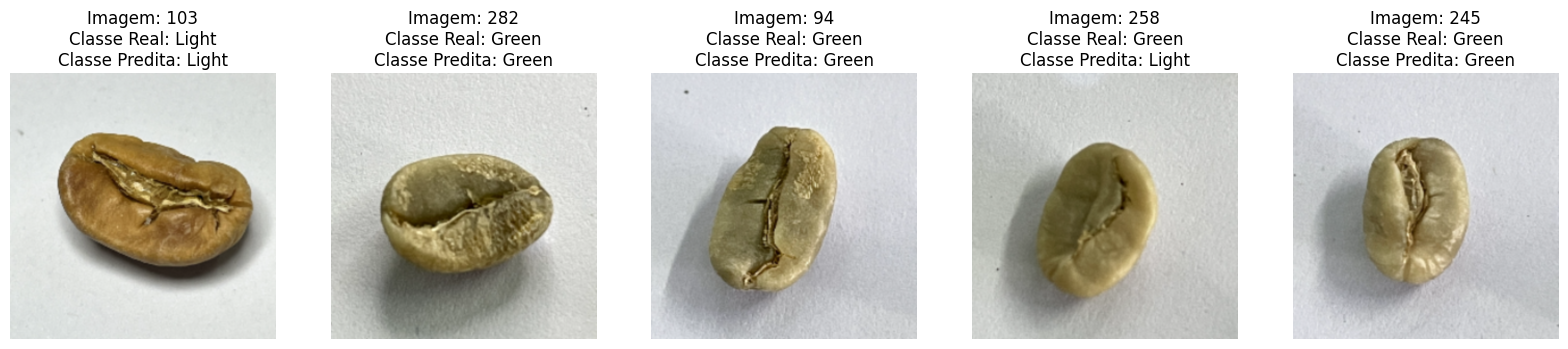

In [36]:
plot_predictions_samples(X_test, y_test, 5)

In [37]:
# Função para plotar uma amostra do dataset
def plot_prediction(dataset_test, class_names_teste, image_id):
    class_names = labels_encoder.classes_

    plt.figure(figsize=(5, 5))
    # Adicionar uma dimensão extra para converter a imagem em um lote
    image_pred = np.expand_dims(dataset_test[image_id], axis=0)

    # Fazer uma previsão
    predictions = model.predict(image_pred)

    # Obter o índice da classe com a maior probabilidade
    predicted_class_index = np.argmax(predictions)

    #retornando o nome da classe predita
    class_pred = class_names[predicted_class_index]

    #retornando o nome da classe original
    class_real= class_names[class_names_teste[image_id]]

    #Plotando o Gráfico
    plt.imshow(dataset_test[image_id])
    plt.title(f'Imagem: {image_id}\nClasse Real: {class_real}\nClasse Predita: {class_pred}')
    plt.axis("off")
    plt.show()

1/1 [==============================] - 0s 18ms/step


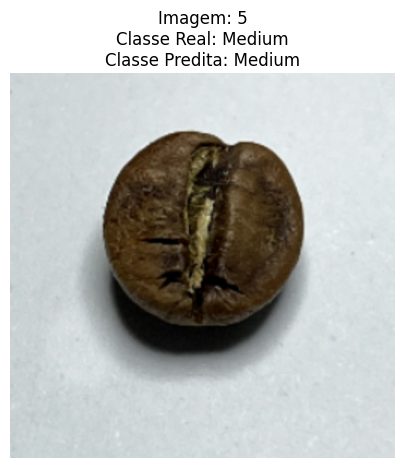

In [38]:
plot_prediction(X_test, y_test, 5)

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
import shutil

# Caminho do arquivo no Colab
src_path = '/content/best_model.h5'

# Caminho do destino no Google Drive
dest_path = '/content/drive/MyDrive/Datasets/Cafe/best_model.h5'

# Certifique-se de que o diretório de destino existe
shutil.copy(src_path, dest_path)

'/content/drive/MyDrive/Datasets/Cafe/best_model.h5'

In [41]:
# Carregar o modelo
model_path = '/content/drive/MyDrive/Datasets/Cafe/best_model.h5'
model_best = tf.keras.models.load_model(model_path)

In [42]:
# Avaliar o modelo nos dados de teste
test_loss, test_acc = model_best.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

10/10 [==============================] - 2s 123ms/step - loss: 0.0928 - accuracy: 0.9812
Test accuracy: 0.98


In [44]:
# Função para plotar uma amostra do dataset
def plot_predictions_samples(dataset_test, class_names_teste, num_images):
    class_names = labels_encoder.classes_

    # Definir o intervalo de valores e o tamanho da amostra
    interval = np.arange(0, len(dataset_test)+1)  # Intervalo de 0 a 100 (incluindo 100)
    sample_size = num_images

    # Selecionar uma amostra aleatória
    random_sample = np.random.choice(interval, size=sample_size, replace=False)


    # Pegar um lote de amostras do dataset
    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        s = random_sample[i]

        # Adicionar uma dimensão extra para converter a imagem em um lote
        image_pred = np.expand_dims(dataset_test[s], axis=0)

        # Fazer uma previsão
        predictions = model_best.predict(image_pred)

        # Obter o índice da classe com a maior probabilidade
        predicted_class_index = np.argmax(predictions)

        #retornando o nome da classe predita
        class_pred = class_names[predicted_class_index]

        #retornando o nome da classe original
        class_real= class_names[class_names_teste[s]]

        #Plotando o Gráfico
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(dataset_test[s])
        plt.title(f'Imagem: {s}\nClasse Real: {class_real}\nClasse Predita: {class_pred}')
        plt.axis("off")
    plt.show()


1/1 [==============================] - 0s 18ms/step


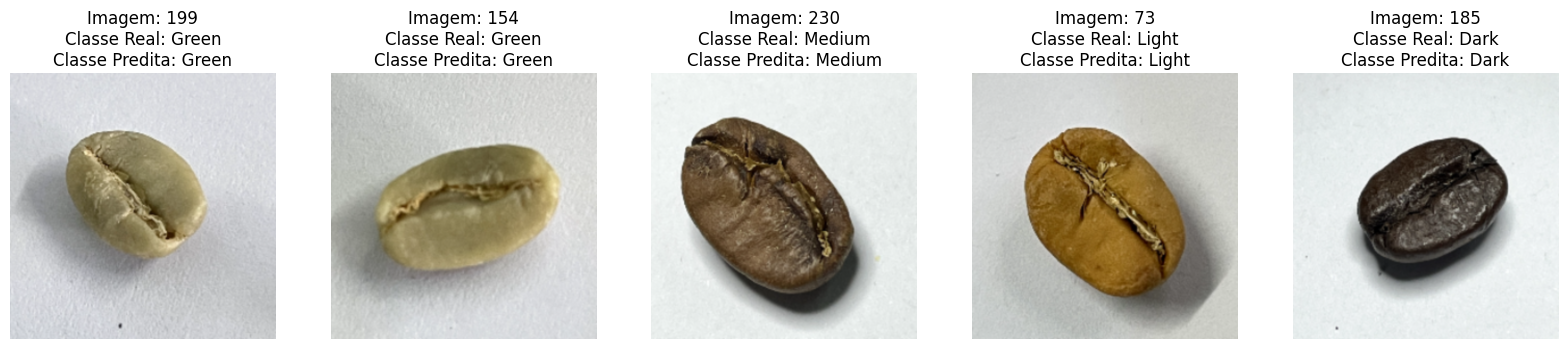

In [45]:
plot_predictions_samples(X_test, y_test, 5)

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image

def plot_predictions(imagem):
    # Carregar a imagem
    Imagem = Image.open(imagem)

    # Converter a imagem para um array NumPy com tamanho correto
    image = tf.keras.preprocessing.image.load_img(imagem, target_size=(512, 512))
    image_array = tf.keras.preprocessing.image.img_to_array(image)

    # Normalizar a imagem
    image_array = image_array / 255.0

    # Adicionar uma dimensão extra para converter a imagem em um lote
    image_batch = np.expand_dims(image_array, axis=0)

    # Fazer uma previsão
    predictions = model_best.predict(image_batch)

    # Obter o índice da classe com a maior probabilidade
    predicted_class_index = np.argmax(predictions)

    # Obter o nome da classe predita
    class_pred = class_names[predicted_class_index]

    # Obter a classe real a partir do caminho da imagem
    class_real = imagem.split('/')[3]

    # Plotar o Gráfico
    plt.imshow(Imagem)
    plt.title(f'Classe Real: {class_real}\nClasse Predita: {class_pred}')
    plt.axis("off")
    plt.show()



1/1 [==============================] - 0s 64ms/step


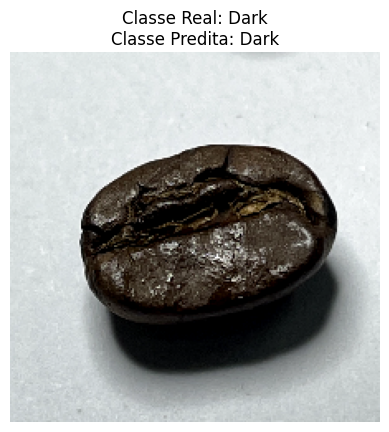

In [53]:
# Chamar a função com o caminho da imagem
imagem = '/content/test/Dark/dark (1).png'
plot_predictions(imagem)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 32)      896       
                                                                 
 average_pooling2d (Average  (None, 256, 256, 32)      0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      18496     
                                                                 
 average_pooling2d_1 (Avera  (None, 128, 128, 64)      0         
 gePooling2D)                                                    
                                                                 
 dropout (Dropout)           (None, 128, 128, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     7

In [ ]:
# Treinar o modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    callbacks=[checkpoint_callback]
)

Epoch 1/10
32/32 [==============================] - ETA: 0s - loss: 2.5944 - accuracy: 0.3623

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 46s 1s/step - loss: 2.5944 - accuracy: 0.3623 - val_loss: 0.7918 - val_accuracy: 0.7031
Epoch 2/10
32/32 [==============================] - 37s 1s/step - loss: 0.4264 - accuracy: 0.8369 - val_loss: 0.1526 - val_accuracy: 0.9531
Epoch 3/10
32/32 [==============================] - 30s 946ms/step - loss: 0.2139 - accuracy: 0.9238 - val_loss: 0.0661 - val_accuracy: 0.9805
Epoch 4/10
32/32 [==============================] - 40s 1s/step - loss: 0.1676 - accuracy: 0.9434 - val_loss: 0.0509 - val_accuracy: 0.9844
Epoch 5/10
32/32 [==============================] - 14s 430ms/step - loss: 0.1283 - accuracy: 0.9551 - val_loss: 0.0763 - val_accuracy: 0.9609
Epoch 6/10
32/32 [==============================] - 14s 446ms/step - loss: 0.2192 - accuracy: 0.9209 - val_loss: 0.2719 - val_accuracy: 0.8945
Epoch 7/10
32/32 [==============================] - 14s 442ms/step - loss: 0.1307 - accuracy: 0.9492 - val_loss: 0.0983 - val_accuracy: 0.9531
Epoch 8/10
32/32 [=

In [ ]:
# Avaliar o modelo nos dados de teste
test_loss, test_acc = model_best.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

10/10 [==============================] - 2s 123ms/step - loss: 0.0928 - accuracy: 0.9812
Test accuracy: 0.98


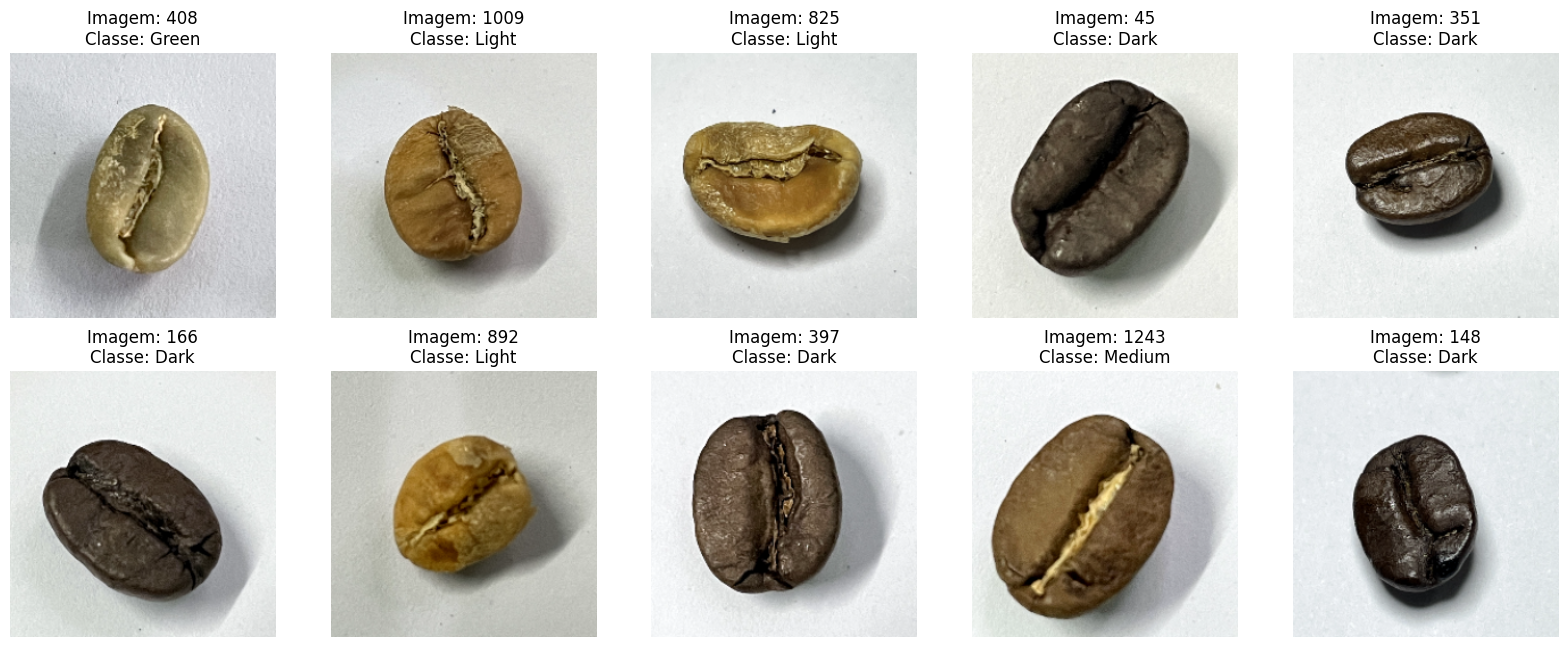

In [ ]:
plot_sample_from_dataset(images_data, labels, 10)


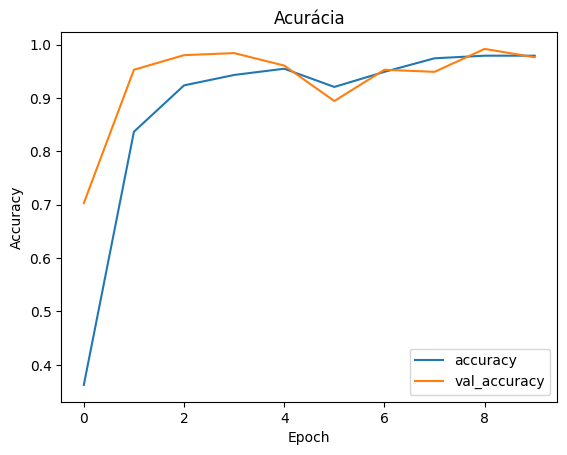

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Acurácia')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

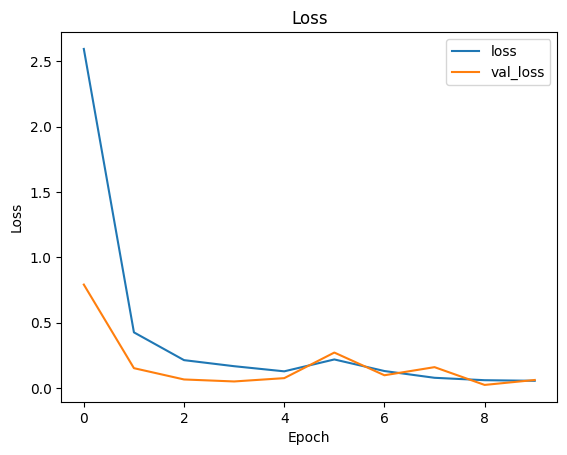

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
# plt.ylim([0.5, 1])
plt.legend(loc='upper right')


1/1 [==============================] - 0s 18ms/step


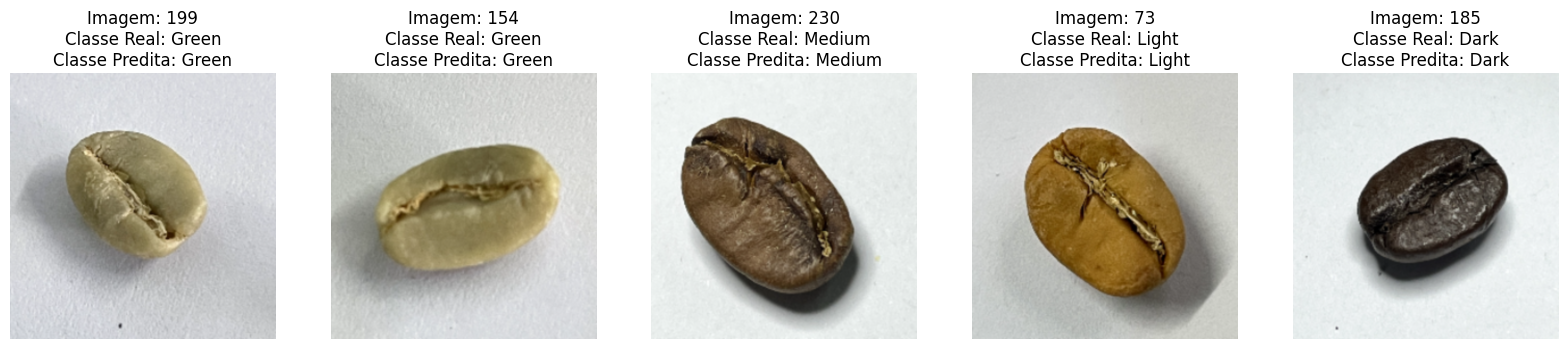

In [ ]:
plot_predictions_samples(X_test, y_test, 5)

1/1 [==============================] - 0s 64ms/step


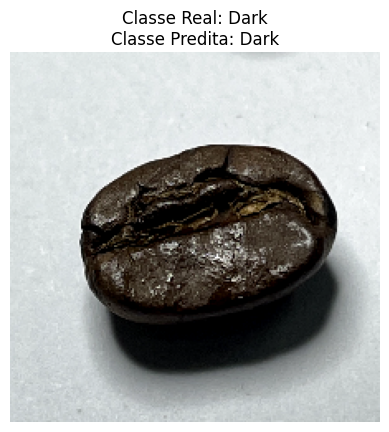

In [ ]:
# Chamar a função com o caminho da imagem
imagem = '/content/test/Dark/dark (1).png'
plot_predictions(imagem)

In [ ]:
# continue ....

In [ ]:
# Fale sobre a arquitetura usada, estratégia, resultado e conclusão.